In [303]:
from qiskit import QuantumCircuit, transpile,QuantumRegister
from qiskit.visualization import plot_bloch_multivector, plot_state_city
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
import numpy as np
from qiskit.circuit.library import QFT
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_city
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
%matplotlib inline

In [304]:
def show_statevector(sv, title=""):
    print("\n" + "="*70)
    print(title)
    print("="*70)
    
    # Print non-zero amplitudes
    for i, amp in enumerate(sv.data):
        if abs(amp) > 1e-6:
            print(f"|{i:010b}>  {amp}")
            
    # Plot Bloch vectors
    fig = plot_bloch_multivector(sv)
    fig.suptitle(title)
    plt.show()


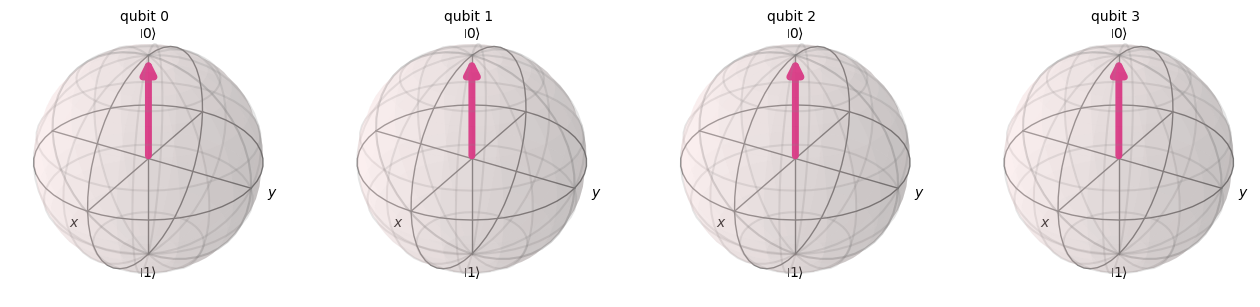

Figure(162.08x451.5)


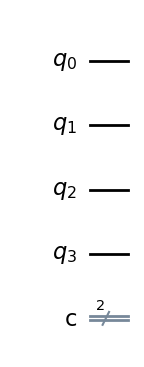


Initial: |0000>
|0000000000>  (1+0j)


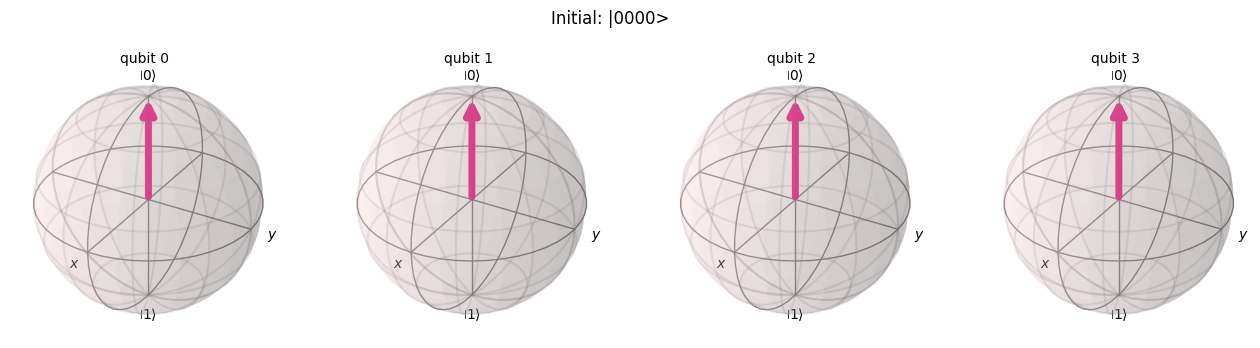

In [305]:
# Create 4-qubit circuit
qc = QuantumCircuit(4, 2)  # 4 qubits, 2 classical bits (final key)
#q0 q1 → User1 chips
#q2 q3 → User2 chips

#Now we have encoded 4-qubit state.

# Simulate initial state
state_vector= Statevector.from_instruction(qc)
plot_bloch_multivector(state_vector)
plt.show()
print(qc.draw('mpl'))
plt.show()
show_statevector(state_vector, "Initial: |0000>")

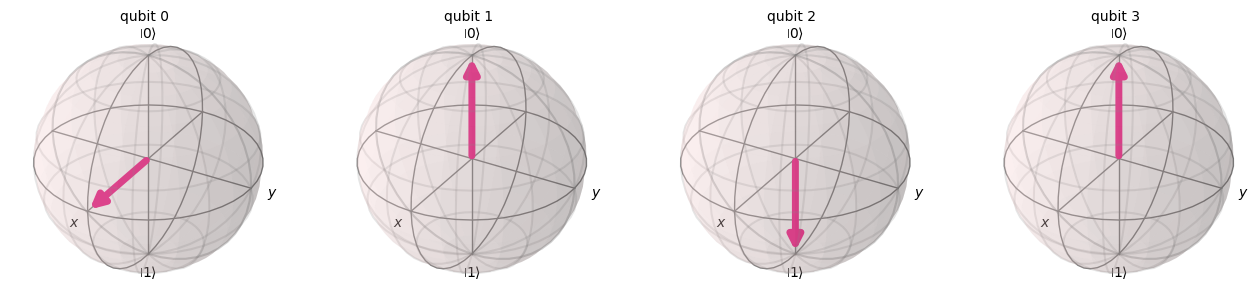

Figure(538.33x451.5)


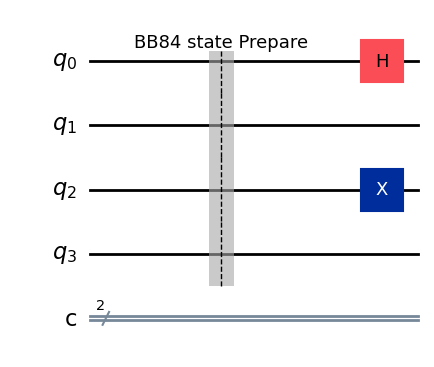


After BB84 State Preperation: ∣Ψ0⟩=∣+⟩⊗∣1⟩
|0000000100>  (0.7071067811865475+0j)
|0000000101>  (0.7071067811865475+0j)


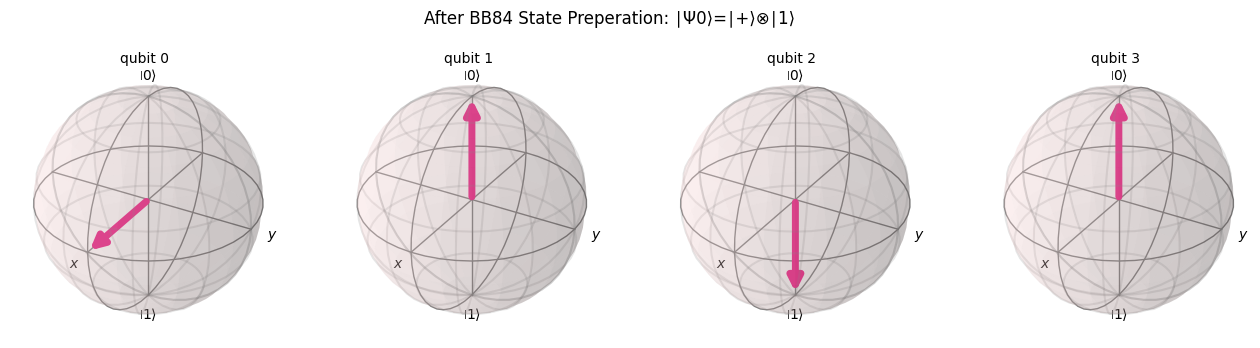

In [306]:
# -----------------
# STEP 1: BB84 prep
# -----------------
# Example: |+> for user1, |1> for user2
qc.barrier(label="BB84 state Prepare")
qc.h(0)        # user1 = |+>
qc.x(2)        # user2 = |1>
# ----- User 2 -----
# Already |0>
#Now the State is ∣Ψ0⟩=∣−⟩⊗∣1⟩


# Simulate initial state
state_vector_after_BB84= Statevector.from_instruction(qc)
plot_bloch_multivector(state_vector_after_BB84)
plt.show()
print(qc.draw('mpl'))
plt.show()
show_statevector(state_vector_after_BB84, "After BB84 State Preperation: ∣Ψ0⟩=∣+⟩⊗∣1⟩")

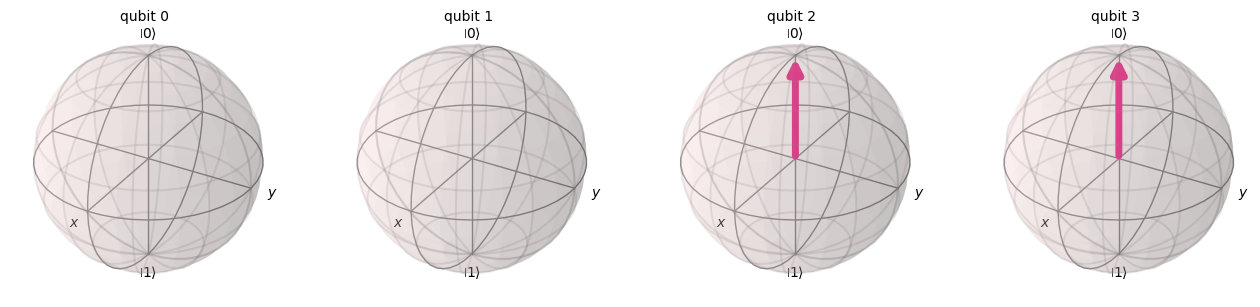

Figure(956.385x451.5)


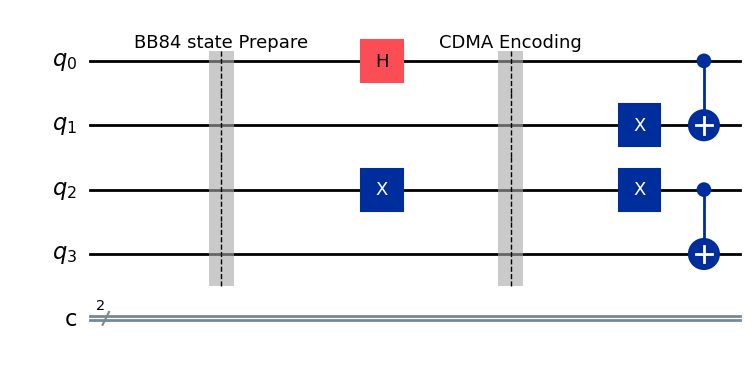


After CDMA Encode:
|0000000000>  (1+0j)


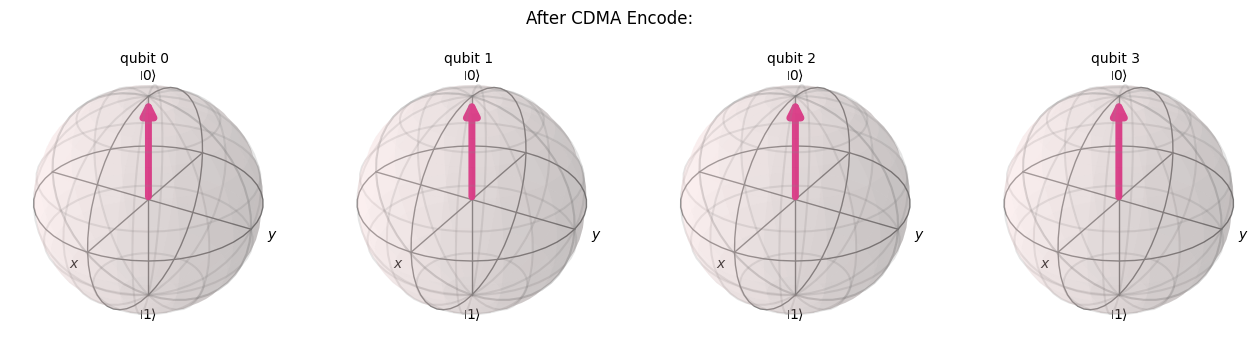

In [307]:
# STEP 2: CDMA Encode
# -----------------
qc.barrier(label="CDMA Encoding")
# User 1  C1=01
qc.x(1)
qc.cx(0,1)

# User 2  C2=10
qc.x(2)
qc.cx(2,3)

# Simulate initial state
state_vector_before_qft= Statevector.from_instruction(qc)
plot_bloch_multivector(state_vector_before_qft)
plt.show()
print(qc.draw('mpl'))
plt.show()
show_statevector(state_vector, "After CDMA Encode:")

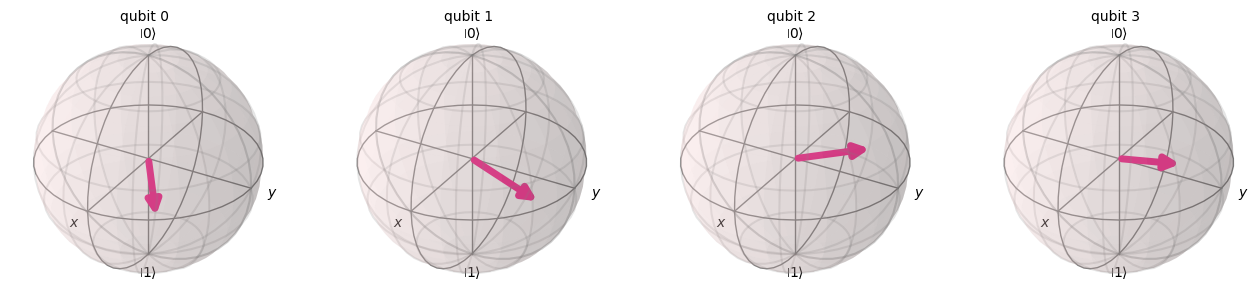

Figure(1123.61x451.5)


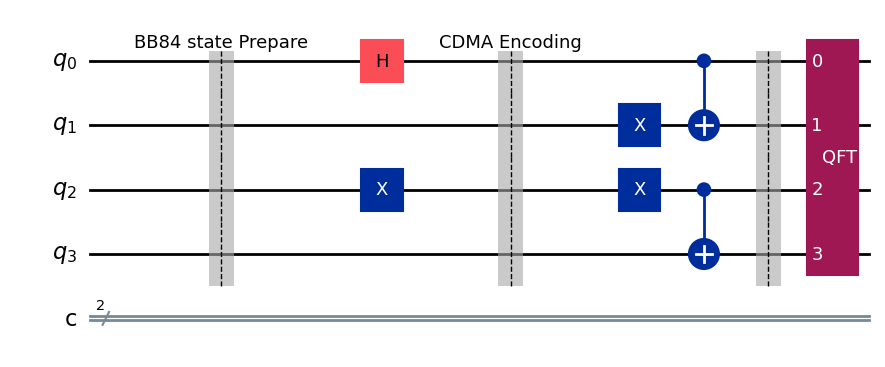


After QFT Multiplexing:
|0000000000>  (0.3535533905932736+0j)
|0000000001>  (0.28832037060954696+0.19264951251827456j)
|0000000010>  (0.12499999999999997+0.30177669529663675j)
|0000000011>  (-0.057350487481725346+0.28832037060954696j)
|0000000100>  (-0.1767766952966368+0.1767766952966368j)
|0000000101>  (-0.19264951251827453+0.03832037060954703j)
|0000000110>  (-0.12499999999999997-0.05177669529663685j)
|0000000111>  (-0.038320370609547044-0.05735048748172535j)
|0000001001>  (-0.03832037060954703+0.05735048748172537j)
|0000001010>  (-0.12499999999999994+0.05177669529663685j)
|0000001011>  (-0.19264951251827456-0.03832037060954703j)
|0000001100>  (-0.1767766952966368-0.1767766952966368j)
|0000001101>  (-0.05735048748172538-0.28832037060954696j)
|0000001110>  (0.12499999999999994-0.30177669529663675j)
|0000001111>  (0.28832037060954696-0.19264951251827456j)


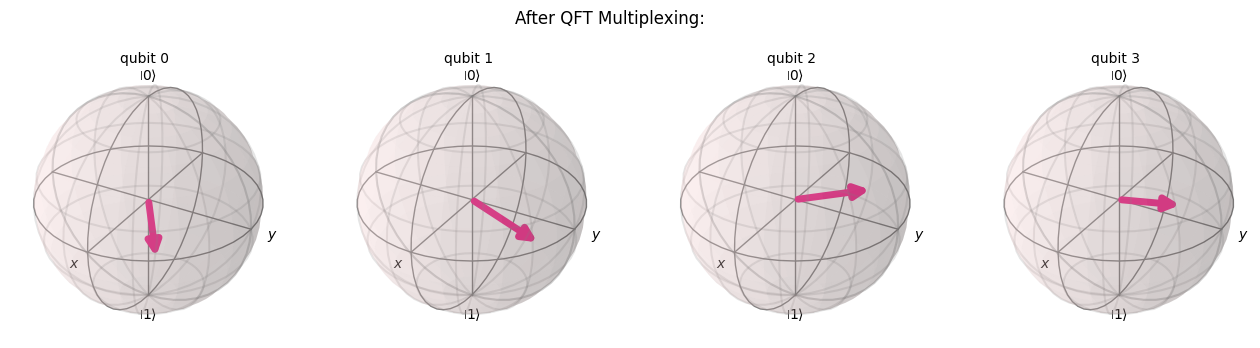

In [308]:
qc.barrier(label="")
# STEP 3: QFT
# -----------------
qc.append(QFT(4), [0,1,2,3])
# Simulate initial state
state_vector= Statevector.from_instruction(qc)
plot_bloch_multivector(state_vector)
plt.show()
print(qc.draw('mpl'))
plt.show()
show_statevector(state_vector, "After QFT Multiplexing:")
#Now system is in Fourier multiplexed state.
#qc.barrier(label="QFT*IQFT=Idenity=I")

In [309]:
# -----------------
# STEP 4: Channel
# (loss handled classically)
# -----------------

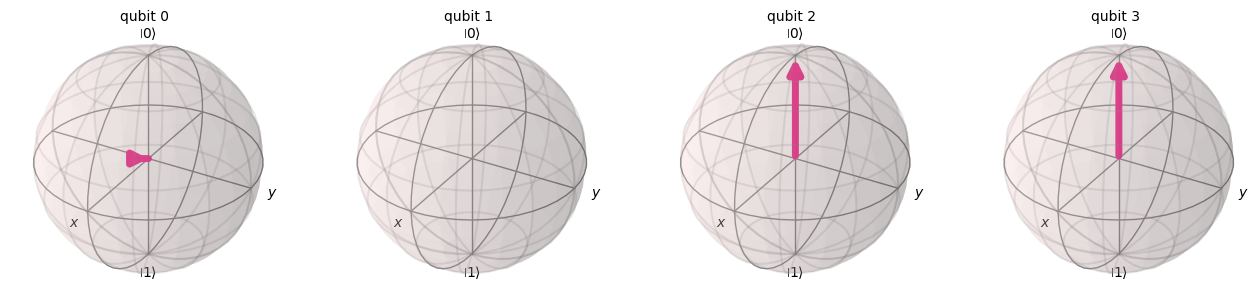

Figure(1207.22x451.5)


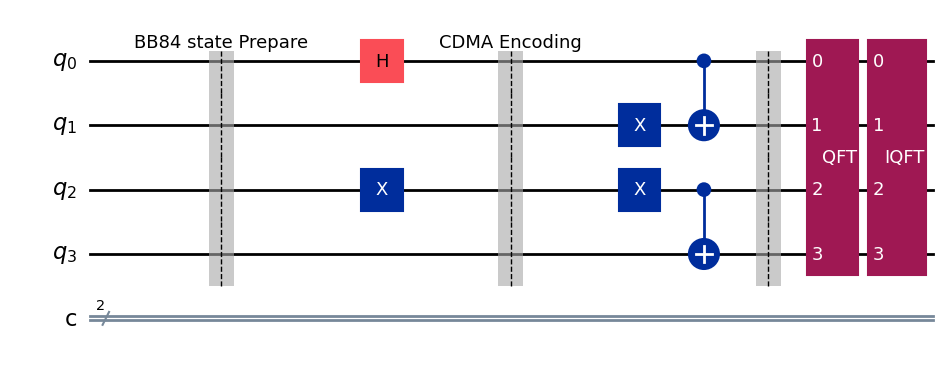


After IQFT De-Multiplexing:
|0000000001>  (0.707106781186547-6.378200895168973e-18j)
|0000000010>  (0.707106781186547-9.205408607085307e-18j)


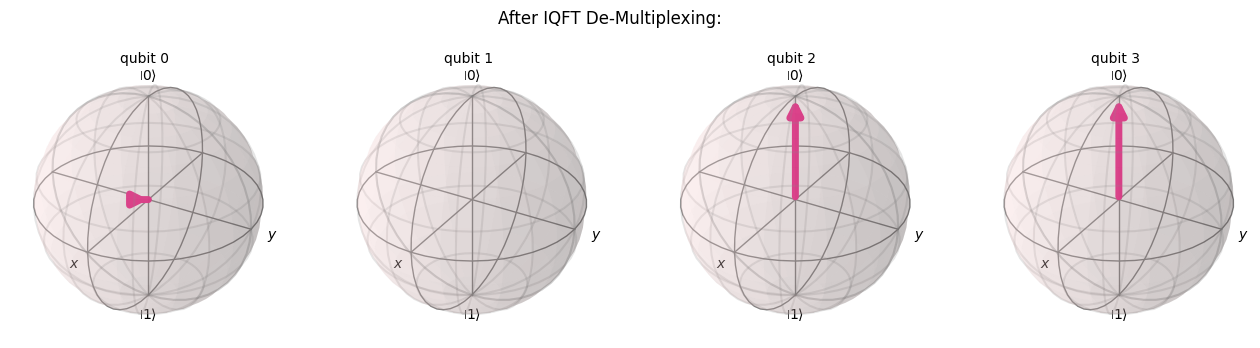

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=4, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(4, 'q'), 0), Qubit(QuantumRegister(4, 'q'), 1), Qubit(QuantumRegister(4, 'q'), 2), Qubit(QuantumRegister(4, 'q'), 3)), clbits=())

In [310]:
# -----------------
# STEP 5: IQFT
# -----------------
qc.append(QFT(4).inverse(), [0,1,2,3])
# Simulate initial state
state_vector_after_iqft= Statevector.from_instruction(qc)
plot_bloch_multivector(state_vector_after_iqft)
plt.show()
print(qc.draw('mpl'))
plt.show()
show_statevector(state_vector_after_iqft, "After IQFT De-Multiplexing:")
#This restores encoded computational state.
qc.barrier(label="")
qc.barrier(label="CDMA Decoding")

In [311]:
  # Check equality
if np.allclose(state_vector_before_qft.data, state_vector_after_iqft.data):
    print("\n✅ Circuit proof: QFT * IQFT = Identity")
else:
    print("\n❌ Circuit proof: QFT * IQFT != Identity")



✅ Circuit proof: QFT * IQFT = Identity


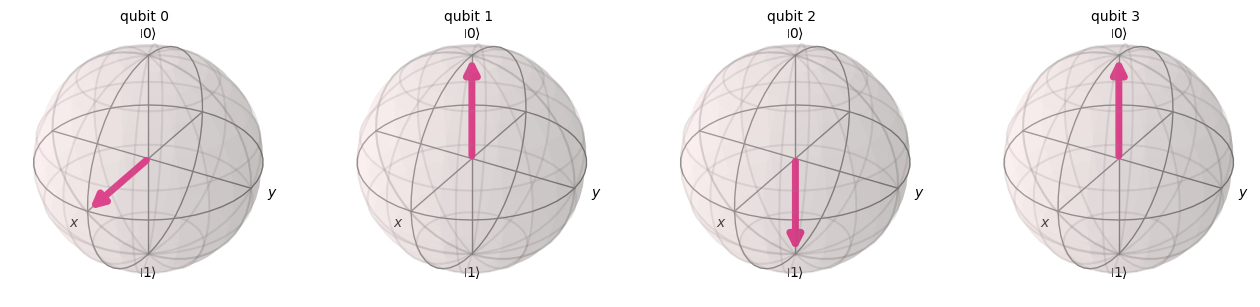

Figure(1708.89x451.5)


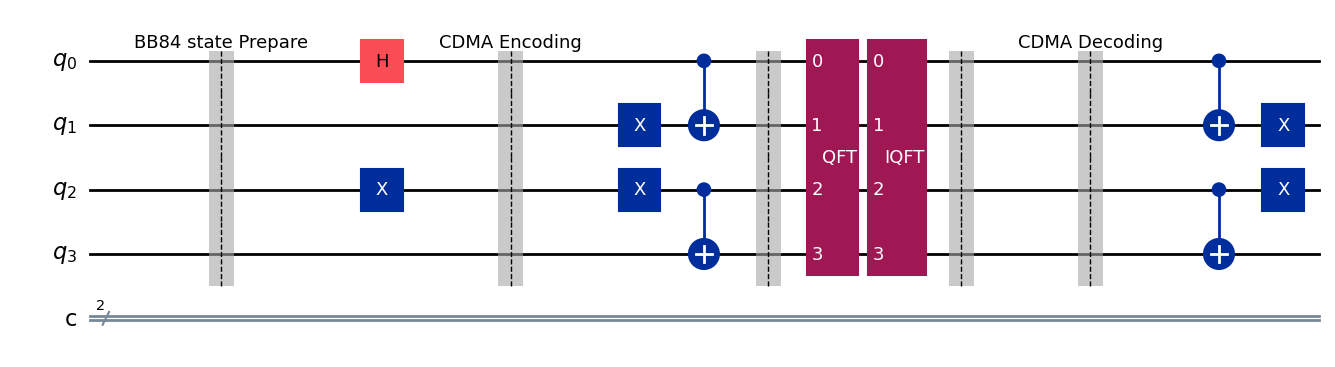


After CDMA Decode:
|0000000100>  (0.707106781186547-9.205408607085307e-18j)
|0000000101>  (0.707106781186547-6.378200895168973e-18j)


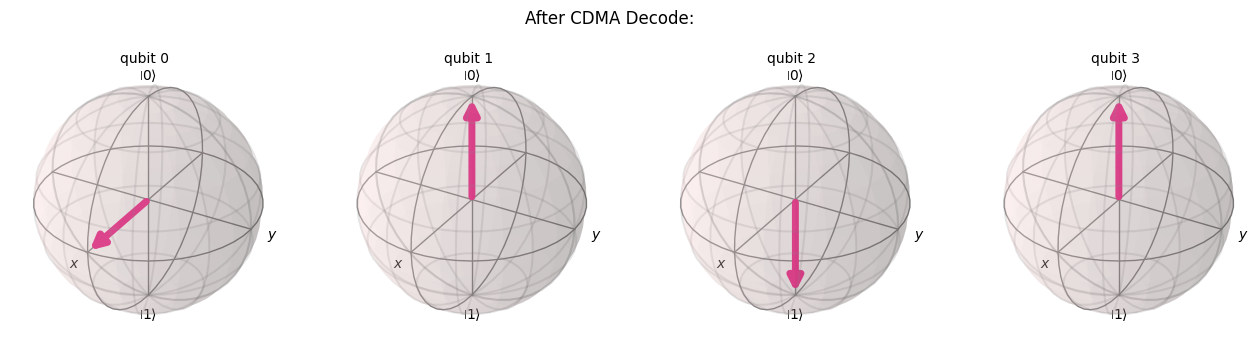

In [312]:
# STEP 6: Decode
# -----------------

qc.cx(2,3)
qc.x(2)
qc.cx(0,1)
qc.x(1)
# Simulate initial state
state_vector_after_CDMA_Decode= Statevector.from_instruction(qc)
plot_bloch_multivector(state_vector_after_CDMA_Decode)
plt.show()
print(qc.draw('mpl'))
plt.show()
show_statevector(state_vector_after_CDMA_Decode, "After CDMA Decode:")

In [313]:
if np.allclose(state_vector_after_BB84.data, state_vector_after_CDMA_Decode.data):
    print("\n✅ Circuit proof: CDMA_Encoding * CDMA_Decoding  = Identity")
else:
    print("\n❌ Circuit proof:CDMA_Encoding * CDMA_Decoding  != Identity")


✅ Circuit proof: CDMA_Encoding * CDMA_Decoding  = Identity


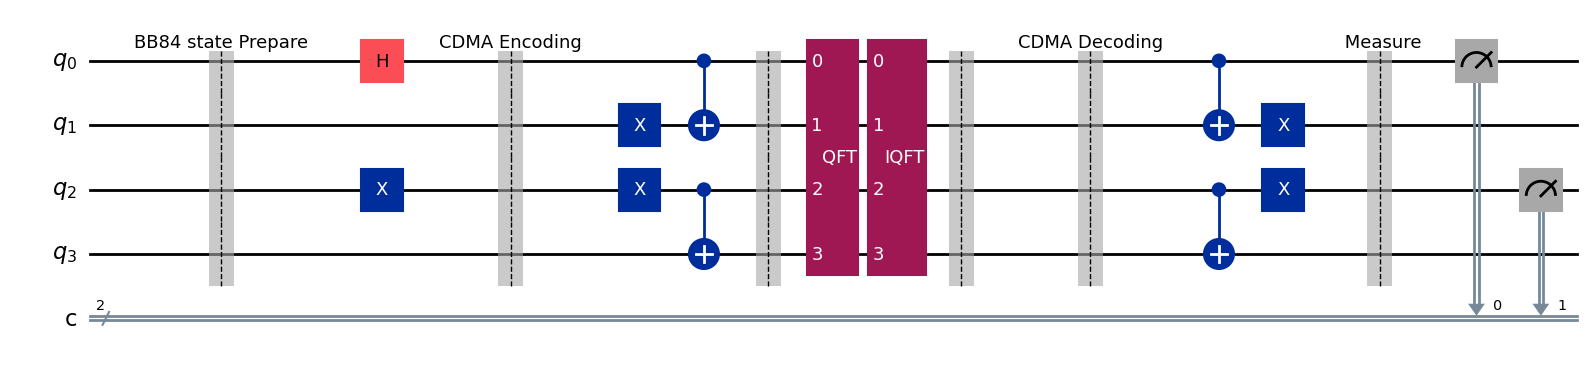

In [314]:
# -----------------
# STEP 7: Measure
# -----------------
qc.barrier(label=" Measure")
qc.measure(0,0)
qc.measure(2,1)

qc.draw('mpl')
#print(qc.draw('mpl'))
plt.show()

In [315]:
from qiskit_aer import AerSimulator
from qiskit import transpile
# To Simulate and Run
sim = AerSimulator()
job = sim.run(transpile(qc, sim), shots=1024)
counts = job.result().get_counts()

#print("\nMeasurement results of (C1x,C1y,C2x,C2y):")
print(counts)

#Expected result:  User1 → always 1  and  User2 → always 0   If no noise → zero QBER.

{'10': 522, '11': 502}


In [316]:
eta = 0.1  # survival probability   ,Change it see the variations 

total_shots = 10000
survivals = int(total_shots * eta)

print("Expected detections:", survivals)

Expected detections: 1000


{'11': 503, '10': 466, '01': 27, '00': 28}


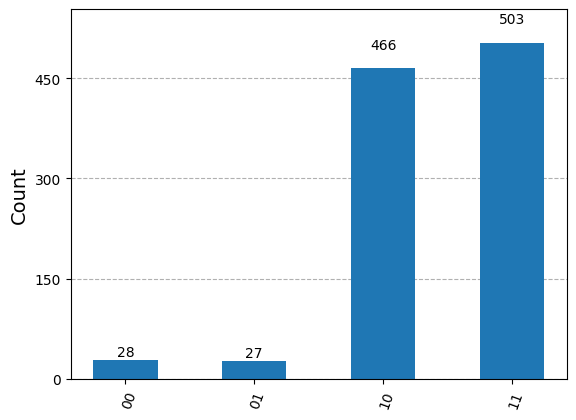

In [317]:
from qiskit_aer.noise import NoiseModel, depolarizing_error

noise_model = NoiseModel()
error = depolarizing_error(0.02, 1)
noise_model.add_all_qubit_quantum_error(error, ['x','h'])

# To Simulate and Run
sim = AerSimulator()
job = sim.run(transpile(qc, sim), shots=1024,noise_model=noise_model)
counts = job.result().get_counts()

#print("\nMeasurement results of (C1x,C1y,C2x,C2y):")
print(counts)
plot_histogram(counts)
plt.show()

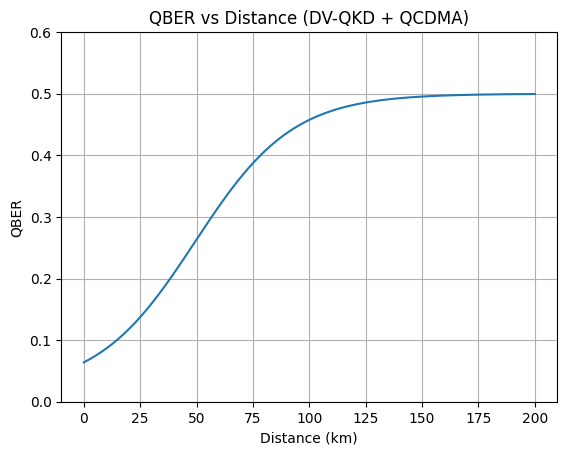

In [318]:
import numpy as np
import matplotlib.pyplot as plt

# -------- PARAMETERS --------
alpha = 0.2          # dB/km
mu = 0.5
eta_d = 0.3
p_d = 1e-7
e_opt = 0.015
G = 64              # spreading gain

# Distance range
L_vals = np.linspace(0, 200, 400)  #(0,200,400)

QBER_vals = []

for L in L_vals:
    
    # Fiber transmission
    t = 10**(-alpha * L / 10)
    
    # Signal detection probability
    p_s = 1 - np.exp(-mu * t * eta_d)
    
    # CDMA interference
    p_MUI = 1 / G
    
    # Total detection probability
    Q = p_s + p_d + p_MUI
    
    # QBER
    E = (e_opt * p_s + 0.5 * p_d + 0.5 * p_MUI) / Q
    
    QBER_vals.append(E)

# -------- PLOT --------

plt.figure()
plt.plot(L_vals, QBER_vals)
plt.xlabel("Distance (km)")
plt.ylabel("QBER")
plt.title("QBER vs Distance (DV-QKD + QCDMA)")
plt.ylim(0, 0.6)
plt.grid(True)
plt.show()

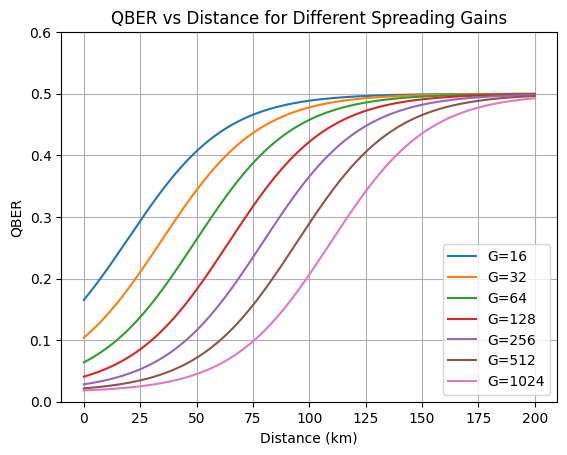

In [319]:
import numpy as np
import matplotlib.pyplot as plt

# -------- PARAMETERS --------
alpha = 0.2          # dB/km
mu = 0.5
eta_d = 0.3
p_d = 1e-7
e_opt = 0.015

G_list = [16, 32, 64, 128, 256, 512, 1024]

# Distance range
L_vals = np.linspace(0, 200, 400)

plt.figure()

for G in G_list:
    
    QBER_vals = []
    
    for L in L_vals:
        
        # Fiber transmission
        t = 10**(-alpha * L / 10)
        
        # Signal detection probability
        p_s = 1 - np.exp(-mu * t * eta_d)
        
        # CDMA interference
        p_MUI = 1 / G
        
        # Total detection probability
        Q = p_s + p_d + p_MUI
        
        # QBER
        E = (e_opt * p_s + 0.5 * p_d + 0.5 * p_MUI) / Q
        
        QBER_vals.append(E)
    
    plt.plot(L_vals, QBER_vals)

# -------- PLOT --------
plt.xlabel("Distance (km)")
plt.ylabel("QBER")
plt.title("QBER vs Distance for Different Spreading Gains")
plt.ylim(0, 0.6)
plt.legend(["G=16","G=32","G=64","G=128","G=256","G=512","G=1024"])
plt.grid(True)
plt.show()

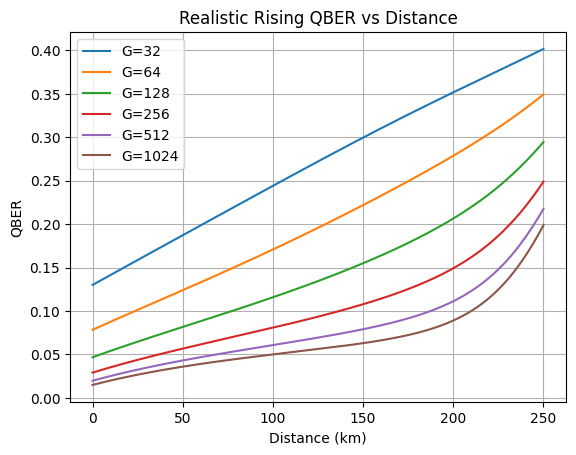

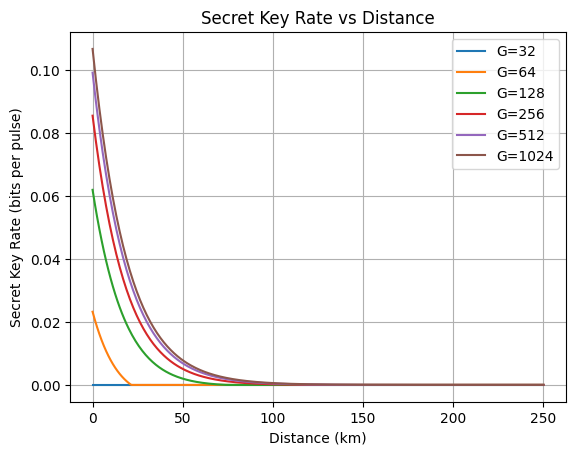

In [320]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Physical parameters
# -----------------------------
alpha = 0.2
eta_d = 0.3
p_d = 1e-7
p_bg = 5e-7              # background photons
e0 = 0.01                # intrinsic optical error
e_vis = 0.04             # visibility degradation strength
L0 = 80                  # degradation length scale
f = 1.16
mu = 0.5
N = 8  # Change it to see the variations

G_list = [32, 64, 128, 256,512,1024]
L_vals = np.linspace(0, 250, 400)

def H2(x):
    x = np.clip(x, 1e-12, 1-1e-12)
    return -x*np.log2(x) - (1-x)*np.log2(1-x)

results_QBER = {}
results_R = {}

for G in G_list:

    QBER_vals = []
    R_vals = []

    for L in L_vals:

        # Channel transmission
        t = 10**(-alpha * L / 10)

        # Signal probability
        p_s = 1 - np.exp(-mu * t * eta_d)

        # Distance-dependent optical error
        e_opt_L = e0 + e_vis * (1 - np.exp(-L / L0))

        # Modified MUI (nonlinear scaling)
        p_MUI = ((N - 1) / G) * (p_s**0.8)

        # Total detection probability
        Q = p_s + p_d + p_bg + p_MUI

        # QBER
        E = (e_opt_L * p_s + 0.5*p_d + 0.5*p_bg + 0.5*p_MUI) / Q

        # Secret key rate
        R = Q * (1 - f*H2(E) - H2(E))
        R = max(R, 0)

        QBER_vals.append(E)
        R_vals.append(R)

    results_QBER[G] = QBER_vals
    results_R[G] = R_vals


# -----------------------------
# Plot QBER
# -----------------------------
plt.figure()
for G in G_list:
    plt.plot(L_vals, results_QBER[G])

plt.xlabel("Distance (km)")
plt.ylabel("QBER")
plt.title("Realistic Rising QBER vs Distance")
plt.legend(["G=32", "G=64", "G=128", "G=256","G=512","G=1024"])
plt.grid(True)
plt.show()


# -----------------------------
# Plot Secret Key Rate
# -----------------------------
plt.figure()
for G in G_list:
    plt.plot(L_vals, results_R[G])

plt.xlabel("Distance (km)")
plt.ylabel("Secret Key Rate (bits per pulse)")
plt.title("Secret Key Rate vs Distance")
plt.legend(["G=32", "G=64", "G=128", "G=256","G=512","G=1024"])
plt.grid(True)
plt.show()